# Dogs vs Cats
## Kaggle Dataset의 일부를 이용한 개, 고양이 구분
### Dog Image: 1,111개, Cat Image: 1,111개, 총 2,222개
### 출처: [pontoregende GitHub](https://github.com/pontorezende/Dogs-vs-Cats-Redux-with-CNN)

In [1]:
import numpy as np
from glob import glob
import cv2, os, random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
path='dogs-vs-cats/train/'

In [4]:
## used for resize and in our model
ROW, COL = 96, 96

dogs, cats = [], []
y_dogs, y_cats = [], []

In [6]:
dog_path = os.path.join(path, 'dog.5*')
len(glob(dog_path))

1111

In [7]:
## Load some our dog images (1,111 개 이미지)
dog_path = os.path.join(path, 'dog.5*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [8]:
cat_path = os.path.join(path, 'cat.5*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [9]:
classes = ['dog', 'cat']

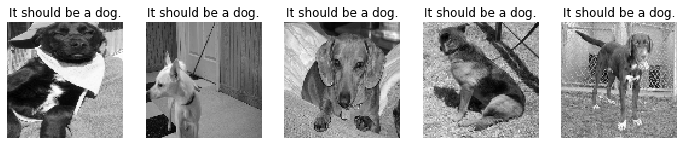

In [10]:
# pip install pillow
#import PIL.Image
plt.figure(figsize=(12,8))    
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[0]))        
plt.show()

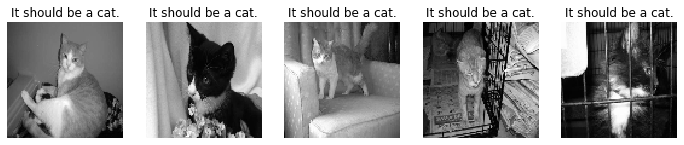

In [11]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[1]))
plt.show()

In [12]:
## just change the labels for 0 and  1
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [13]:
## converting everything to Numpy array to fit in our model
## them creating a X and target file like we used to see
## in Machine and Deep Learning models
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [14]:
X = np.concatenate((dogs,cats), axis=0)
y = np.concatenate((y_dogs, y_cats), axis=0)

In [15]:
len(X)

2222

In [17]:
## One-Hot Encoding
y = tf.keras.utils.to_categorical(y, 2)

In [18]:
## Here is our model as a CNN
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, 1), 
           activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(2, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0

In [19]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(), metrics=['accuracy'])

In [20]:
## to save checkpoint to use later
checkpoint = ModelCheckpoint('model/dogs_vs_cats_checkpoint.h5')
model.fit(X, y, batch_size=32, epochs=40, validation_split=0.2,
          verbose=2, callbacks=[checkpoint])

Train on 1777 samples, validate on 445 samples
Epoch 1/40
1777/1777 - 34s - loss: 0.7500 - accuracy: 0.6128 - val_loss: 1.0010 - val_accuracy: 0.0000e+00
Epoch 2/40
1777/1777 - 33s - loss: 0.6561 - accuracy: 0.6252 - val_loss: 0.9459 - val_accuracy: 0.0000e+00
Epoch 3/40
1777/1777 - 32s - loss: 0.6568 - accuracy: 0.6252 - val_loss: 1.0128 - val_accuracy: 0.0000e+00
Epoch 4/40
1777/1777 - 32s - loss: 0.6372 - accuracy: 0.6353 - val_loss: 0.9181 - val_accuracy: 0.2090
Epoch 5/40
1777/1777 - 33s - loss: 0.6333 - accuracy: 0.6505 - val_loss: 0.8451 - val_accuracy: 0.1258
Epoch 6/40
1777/1777 - 32s - loss: 0.6105 - accuracy: 0.6691 - val_loss: 0.8640 - val_accuracy: 0.3258
Epoch 7/40
1777/1777 - 32s - loss: 0.5845 - accuracy: 0.6798 - val_loss: 0.6869 - val_accuracy: 0.4315
Epoch 8/40
1777/1777 - 32s - loss: 0.5592 - accuracy: 0.7085 - val_loss: 1.2109 - val_accuracy: 0.2944
Epoch 9/40
1777/1777 - 32s - loss: 0.5224 - accuracy: 0.7434 - val_loss: 0.7207 - val_accuracy: 0.5685
Epoch 10/40
17

In [21]:
scores = model.evaluate(X, y, verbose=2)
print('MODEL ACCURACY: %.5f' % scores[1])

2222/1 - 8s - loss: 2.2380 - accuracy: 0.9176
MODEL ACCURACY: 0.91764
